In [1]:
from pathlib import Path

import cartopy.crs as ccrs
import iris
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

from mcs_prime import mcs_prime_config_util as cu

/home/users/mmuetz/projects/mcs_prime/mcs_prime/mcs_prime_config_util.py:69: UserWarning: Warning: path missing era5dir: /does/not/exist
  warnings.warn(f"Warning: path missing {k}: {path}")


In [2]:
import matplotlib as mpl
mpl.__version__

'3.5.1'

In [3]:
datadir = cu.PATHS['datadir']
simdir = datadir / 'UM_sims'

In [8]:
if False:
    # Load from .pp
    ppa = iris.load(simdir / 'u-dg135/init_tests/em0/englaa_pa000.pp')
    ppa
    
    pflux0 = xr.DataArray.from_iris(ppa[24])
    pflux = xr.DataArray.from_iris(ppa[25])
else:
    # dsa = xr.open_mfdataset([simdir / f'u-dg135/share/cycle/20200701T0000Z/engl/um/em0/englaa_pa0{hh}.iris.nc' for hh in ['00', '24']], compat='override')

    dsa = xr.open_dataset(simdir / 'u-dg135/share/cycle/20200701T0000Z/engl/um/em0/englaa_pa000.iris.nc')
    pflux = dsa.precipitation_flux
    pflux0 = dsa.precipitation_flux_0
    pflux = pflux.rename(time_0='time')
    pflux0 = pflux0.rename(time_1='time')
    


In [9]:
pflux.time

<xarray.DataArray 'time' (time: 24)>
array(['2020-07-01T04:00:00.000000000', '2020-07-01T05:00:00.000000000',
       '2020-07-01T06:00:00.000000000', '2020-07-01T07:00:00.000000000',
       '2020-07-01T08:00:00.000000000', '2020-07-01T09:00:00.000000000',
       '2020-07-01T10:00:00.000000000', '2020-07-01T11:00:00.000000000',
       '2020-07-01T12:00:00.000000000', '2020-07-01T13:00:00.000000000',
       '2020-07-01T14:00:00.000000000', '2020-07-01T15:00:00.000000000',
       '2020-07-01T16:00:00.000000000', '2020-07-01T17:00:00.000000000',
       '2020-07-01T18:00:00.000000000', '2020-07-01T19:00:00.000000000',
       '2020-07-01T20:00:00.000000000', '2020-07-01T21:00:00.000000000',
       '2020-07-01T22:00:00.000000000', '2020-07-01T23:00:00.000000000',
       '2020-07-02T00:00:00.000000000', '2020-07-02T01:00:00.000000000',
       '2020-07-02T02:00:00.000000000', '2020-07-02T03:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time                       (time) datetime64[ns] 2020-07-01T04:00:00 ... ...
    forecast_period_0          (time) timedelta64[ns] ...
    forecast_reference_time_0  (time) datetime64[ns] ...
    height                     float64 ...
    forecast_period_2          timedelta64[ns] ...
    forecast_reference_time_1  datetime64[ns] ...
    time_2                     datetime64[ns] ...
    height_0                   float32 ...
    height_1                   float64 ...
Attributes:
    axis:           T
    standard_name:  time

In [1]:
%%script false --n
%%capture
# Set up the figure, the axis, and the plot element we want to animate
fig, axes = plt.subplots(2, 1, subplot_kw={'projection': ccrs.PlateCarree()}, layout='constrained')
fig.set_size_inches(10, 10)

# colors = ['#800080', '#0000FF', '#6495ED', '#7FFFD4', '#66CDAA', '#32CD32', '#ADFF2F', '#FFFF99', '#FFD700', '#FFA500', '#FF4500', '#800080']
colors = ['#FFFFFF', '#0000FF', '#6495ED', '#7FFFD4', '#66CDAA', '#32CD32', '#ADFF2F', '#FFFF99', '#FFD700', '#FFA500', '#FF4500', '#800080']
# Create a custom colormap
cmap = mcolors.ListedColormap(colors)
im = axes[0].contourf(pflux.longitude, pflux.latitude, pflux[0] * 360 * 24, levels=np.arange(13), cmap=cmap)
plt.colorbar(im, ax=axes) 

CalledProcessError: Command 'b"%%capture\n# Set up the figure, the axis, and the plot element we want to animate\nfig, axes = plt.subplots(2, 1, subplot_kw={'projection': ccrs.PlateCarree()}, layout='constrained')\nfig.set_size_inches(10, 10)\n\n# colors = ['#800080', '#0000FF', '#6495ED', '#7FFFD4', '#66CDAA', '#32CD32', '#ADFF2F', '#FFFF99', '#FFD700', '#FFA500', '#FF4500', '#800080']\ncolors = ['#FFFFFF', '#0000FF', '#6495ED', '#7FFFD4', '#66CDAA', '#32CD32', '#ADFF2F', '#FFFF99', '#FFD700', '#FFA500', '#FF4500', '#800080']\n# Create a custom colormap\ncmap = mcolors.ListedColormap(colors)\nim = axes[0].contourf(pflux.longitude, pflux.latitude, pflux[0] * 360 * 24, levels=np.arange(13), cmap=cmap)\nplt.colorbar(im, ax=axes) \n"' returned non-zero exit status 1.

In [11]:
%%script false
# pmax = max(pflux.values.max(), pflux0.values.max())
# Update function for the animation
def update(frame):
    print(frame)
    for ax in axes:
        ax.cla()
        ax.coastlines()
    axes[0].contourf(pflux.longitude, pflux.latitude, pflux[frame] * 360 * 24, levels=np.arange(13), cmap=cmap)
    im = axes[1].contourf(pflux0.longitude, pflux0.latitude, pflux0[frame] * 360 * 24, levels=np.arange(13), cmap=cmap)
    

# Create the animation object
ani = FuncAnimation(fig, update, frames=range(2))

# Display the animation in the notebook
HTML(ani.to_jshtml())

0
0
1


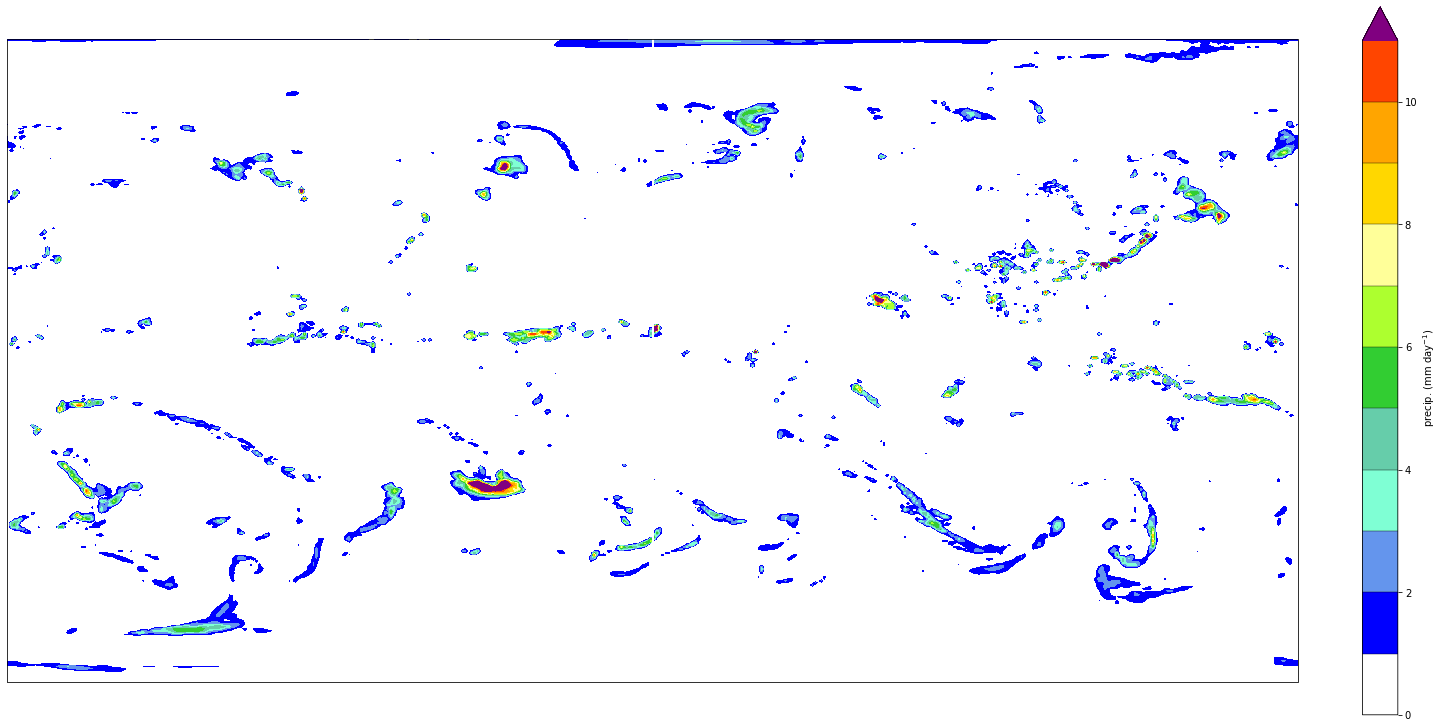

In [12]:
#%%capture
# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, layout='constrained')
fig.set_size_inches(20, 10)

# colors = ['#800080', '#0000FF', '#6495ED', '#7FFFD4', '#66CDAA', '#32CD32', '#ADFF2F', '#FFFF99', '#FFD700', '#FFA500', '#FF4500', '#800080']
colors = ['#FFFFFF', '#0000FF', '#6495ED', '#7FFFD4', '#66CDAA', '#32CD32', '#ADFF2F', '#FFFF99', '#FFD700', '#FFA500', '#FF4500', '#800080']
# Create a custom colormap
cmap = mcolors.ListedColormap(colors[:-1])
cmap.set_over(colors[-1])
im = ax.contourf(pflux.longitude, pflux.latitude, pflux[0] * 360 * 24, levels=np.arange(12), cmap=cmap, extend='max')
plt.colorbar(im, ax=ax, label='precip. (mm day$^{-1}$)', drawedges=True) 

In [9]:
# pmax = max(pflux.values.max(), pflux0.values.max())
# Update function for the animation
def update(frame):
    print(frame)
    ax.cla()
    time = pd.Timestamp(pflux.time[frame].values.item())
    ax.set_title(f'N216 EM0 {time}')
    ax.coastlines()
    ax.contourf(pflux.longitude, pflux.latitude, pflux[frame] * 360 * 24, levels=np.arange(13), cmap=cmap, extend='max')
    

# Create the animation object
ani = FuncAnimation(fig, update, frames=range(12))

# Display the animation in the notebook
HTML(ani.to_jshtml())
# HTML(ani.to_html5_video())

0
0
1
2
3
4
5
6
7
8
9
10
11


In [10]:
# I have used a constrained layout to setup the figure. However, placing text 
# below the bottom of the fig messes up the layout for 0, 12 due to the placement
# of the LST text. This should fix things for anim:
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html#manually-turning-off-constrained-layout
# fig.set_layout_engine('none') # <- most recent matplotlib - I am using 3.5.1:
# https://matplotlib.org/3.5.3/tutorials/intermediate/constrainedlayout_guide.html#manually-turning-off-constrained-layout
fig.set_constrained_layout(False)
def calc_lon_lst0_lst12(h):
    lon_lst0 = -h * 15
    lon_lst12 = -(h - 12) * 15

    lon_lst0 = (lon_lst0 + 180) % 360 - 180
    lon_lst12 = (lon_lst12 + 180) % 360 - 180
    return lon_lst0, lon_lst12

# pmax = max(pflux.values.max(), pflux0.values.max())
# Update function for the animation
def update(frame):
    print(frame)
    ax.cla()
    time = pd.Timestamp(pflux.time[frame].values.item())
    ax.set_title(f'N216 EM0 {time}')
    ax.coastlines()

    lst0, lst12 = calc_lon_lst0_lst12(time.hour)
    ax.axvline(x=lst0, c='k')
    ax.axvline(x=lst12, c='orange')
    ax.text(x=lst0, y=-100, s='0000 LST', ha='center')
    ax.text(x=lst12, y=-100, s='1200 LST', ha='center', c='orange')

    ax.contourf(pflux.longitude, pflux.latitude, pflux[frame] * 360 * 24, levels=np.arange(13), cmap=cmap, extend='max')
    

# Create the animation object
ani = FuncAnimation(fig, update, frames=range(24))

# Display the animation in the notebook
# HTML(ani.to_jshtml())
HTML(ani.to_html5_video())

0
0
1
2
3
4
5
6
7
8
9
10
11


In [11]:
np.linspace(-180, 165, 24) + 15 / 2

array([-172.5, -157.5, -142.5, -127.5, -112.5,  -97.5,  -82.5,  -67.5,
        -52.5,  -37.5,  -22.5,   -7.5,    7.5,   22.5,   37.5,   52.5,
         67.5,   82.5,   97.5,  112.5,  127.5,  142.5,  157.5,  172.5])

In [12]:
t = pd.Timestamp(pflux.time_0[0].values.item())

AttributeError: 'DataArray' object has no attribute 'time_0'

In [ ]:
ts = np.arange(24)

In [ ]:
ts

In [ ]:
lon_ts0 = ts * 15 % 180
lon_ts0

In [ ]:
def calc_lon_ts0_ts12(h):
    lon_ts0 = -h * 15
    lon_ts12 = -(h - 12) * 15

    lon_ts0 = (lon_ts0 + 180) % 360 - 180
    lon_ts12 = (lon_ts12 + 180) % 360 - 180
    return lon_ts0, lon_ts12

for h in ts:
    print(h, calc_lon_ts0_ts12(h))